Text(0.5,1,'Shows the most common numbers of passengers')

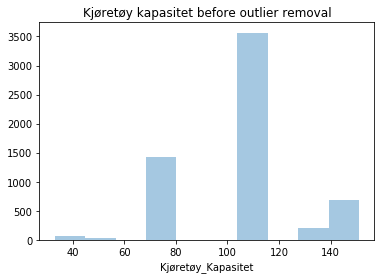

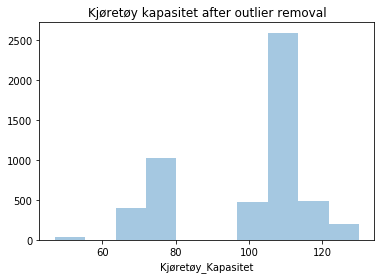

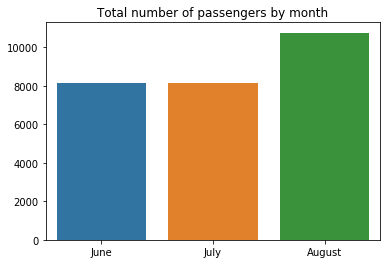

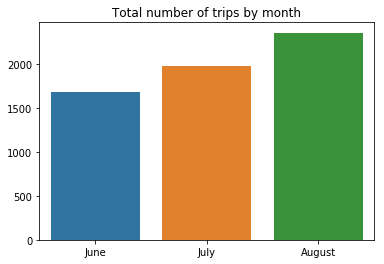

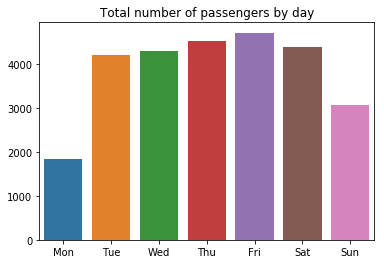

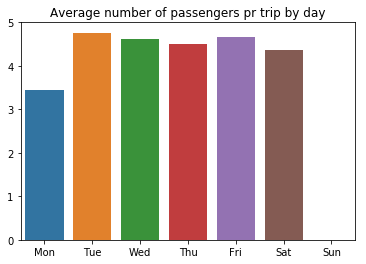

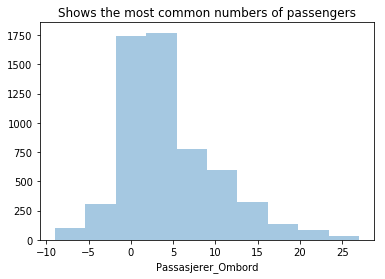

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

ruterData = pd.read_csv('ruterData.csv', delimiter=';')

#Plots Kjøretøy_Kapasitet
plt.figure()
sns.distplot(ruterData['Kjøretøy_Kapasitet'], bins=10, kde=False)
plt.title("Kjøretøy kapasitet before outlier removal") 

#Removes outliers in Kjøretøy_Kapasitet
thresold_max = ruterData['Kjøretøy_Kapasitet'].quantile(0.99)
thresold_min = ruterData['Kjøretøy_Kapasitet'].quantile(0.01)
kapasitet_no_outliers = ruterData[(ruterData['Kjøretøy_Kapasitet']<thresold_max) & (ruterData['Kjøretøy_Kapasitet']>thresold_min)]

#Plots Kjøretøy_Kapasitet after outlier removal
plt.figure()
sns.distplot(kapasitet_no_outliers['Kjøretøy_Kapasitet'], bins=10, kde=False)
plt.title("Kjøretøy kapasitet after outlier removal") 

#Adds together all Passajerer_Ombord inn the same month
date_month = ruterData.copy()['Dato']
month_tot_Passasjerer = [0] * 3
month_tot_times = [0] * 3

daysJune = 30
daysJuly = 31
weekDays = ['Mon', "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
passasjerer_pr_day = [0] * 7
depatures_pr_day = [0] * 7

for i in range(0, len(date_month)):
    date_day = int(date_month[i].split("/")[0])
    date_month[i] = int(date_month[i].split("/")[1])
    month_tot_Passasjerer[int(date_month[i])-6] += ruterData['Passasjerer_Ombord'][i]
    month_tot_times[date_month[i]-6] += 1
    
    #Adding days from months before, so i don't need to calculate first day again
    if date_month[i] == 7:
        date_day += daysJune
    elif date_month[i] == 8:
        date_day += daysJune + daysJuly
        
    #June 1st 2020 was a monday 
    passasjerer_pr_day[date_day%7] += ruterData['Passasjerer_Ombord'][i]
    depatures_pr_day[date_day%7] += 1

months = ['June','July','August']


plt.figure()
sns.barplot(x = months, y = month_tot_Passasjerer)
plt.title("Total number of passengers by month") 
    
plt.figure()
sns.barplot(x = months, y = month_tot_times)
plt.title("Total number of trips by month") 

avg_passasjerer_pr_day = [0] * 7
for i in range (0,6):
    avg_passasjerer_pr_day[i] = passasjerer_pr_day[i]/depatures_pr_day[i]
 
plt.figure()
sns.barplot(x = weekDays, y = passasjerer_pr_day)
plt.title("Total number of passengers by day")

plt.figure()
sns.barplot(x = weekDays, y = avg_passasjerer_pr_day)
plt.title("Average number of passengers pr trip by day") 

thresold_max = ruterData['Passasjerer_Ombord'].quantile(0.99)
thresold_min = ruterData['Passasjerer_Ombord'].quantile(0.01)
passasjerer_no_outliers = ruterData[(ruterData['Passasjerer_Ombord']<thresold_max) & (ruterData['Passasjerer_Ombord']>thresold_min)]

plt.figure()
sns.distplot(passasjerer_no_outliers['Passasjerer_Ombord'], bins=10, kde=False)
plt.title("Shows the most common numbers of passengers")